# Instalación de módulos


https://scikit-learn.org/stable/index.html


```sh
pip install -U scikit-learn
```

Esto nos instalará algunas dependencias que también utilizaremos, algunas de las más destacadas son:

- NumPy
- Pandas
- MatplotLib

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Lectura de datos de sklearn

In [2]:
import sklearn.datasets

iris_dataset = skl.datasets.load_iris(as_frame = True)


In [3]:
print(iris_dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


Podemos renombrar los columnas para que sea más sencillo el uso:

In [5]:
iris_dataset.frame = iris_dataset.frame.rename(columns = {"sepal length (cm)": "SepalLength", 
                               "sepal width (cm)": "SepalWidth",
                               "petal length (cm)": "PetalLength",
                               "petal width (cm)": "PetalWidth",
                               "target": "Class"
                              })

In [6]:
iris_dataset.frame

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
iris_dataset.frame["SepalLength"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLength, Length: 150, dtype: float64

## Lectura de datos usando Pandas

Vamos a leer el conjunto de datos [Auto MPG](https://archive-beta.ics.uci.edu/ml/datasets/auto+mpg), del UCI ML Repository.

In [8]:
MPG_PATH = "datasets/auto-mpg.data"

nombres_columnas_mpg = ["mpg", "cylinders", "displacement", "horsepower", "weigth", "acceleration", "model year", "origin", "car name"]

mpg_dataset = pd.read_csv(MPG_PATH, sep = '\s+', header = None, names = nombres_columnas_mpg)

In [9]:
mpg_dataset

,mpg,cylinders,displacement,horsepower,weigth,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


## Análisis de los datos con Matplotlib

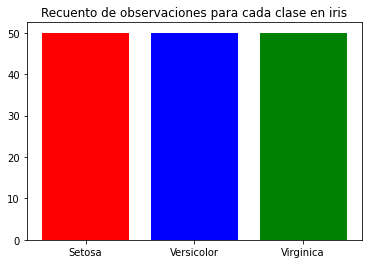

<Figure size 432x288 with 0 Axes>

In [10]:
iris_setosa = iris_dataset.frame[iris_dataset.frame["Class"] == 0]
iris_versicolor = iris_dataset.frame[iris_dataset.frame["Class"] == 1]
iris_virginica = iris_dataset.frame[iris_dataset.frame["Class"] == 2]

colores_grafico = ["red", "blue", "green"]


valores = [len(iris_setosa), len(iris_versicolor), len(iris_virginica)]

plt.bar(["Setosa", "Versicolor", "Virginica"], valores, color = colores_grafico)

plt.title("Recuento de observaciones para cada clase en iris")
plt.show()
plt.clf()


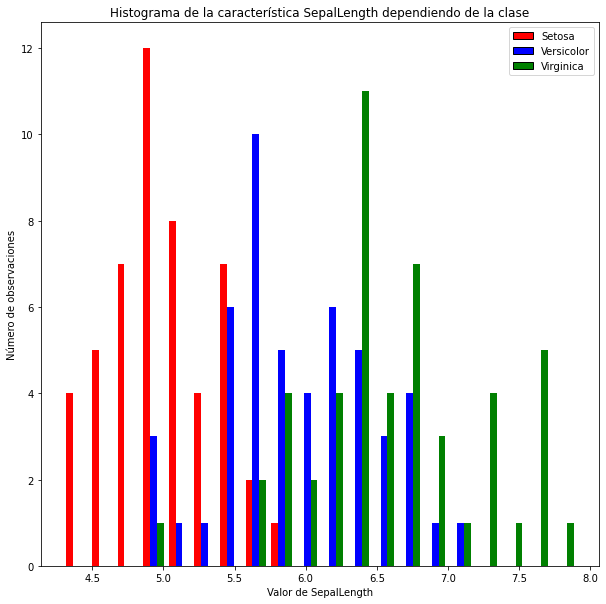

<Figure size 432x288 with 0 Axes>

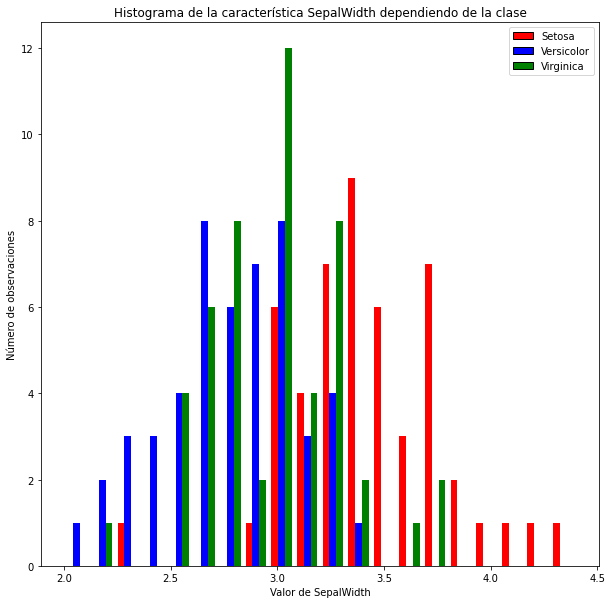

<Figure size 432x288 with 0 Axes>

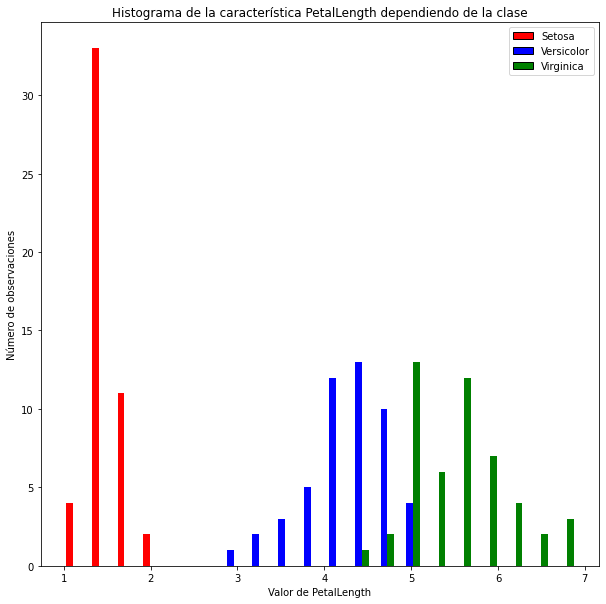

<Figure size 432x288 with 0 Axes>

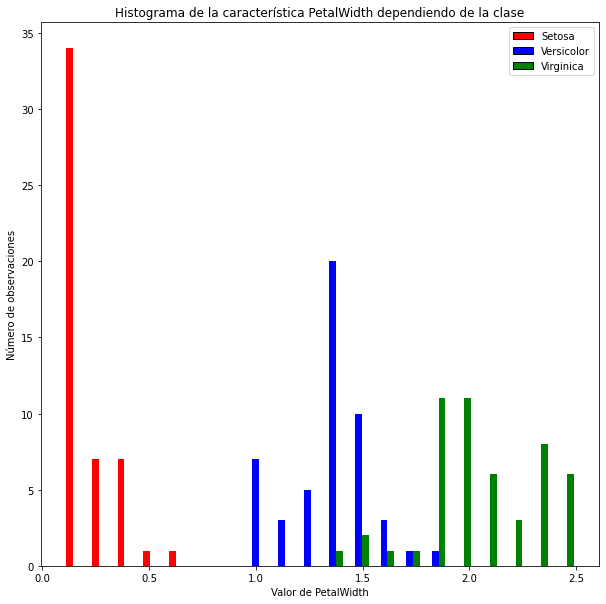

<Figure size 432x288 with 0 Axes>

In [11]:

for column in iris_dataset.frame.columns[:-1]:
    
    plt.figure(figsize = (10, 10))
    plt.hist([iris_setosa[column], iris_versicolor[column], iris_virginica[column]], bins = 20, color = colores_grafico)
    plt.title("Histograma de la característica {} dependiendo de la clase".format(column))
    plt.xlabel("Valor de {}".format(column))
    plt.ylabel("Número de observaciones")

    handles = [matplotlib.patches.Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colores_grafico]
    labels = ["Setosa", "Versicolor", "Virginica"]
    plt.legend(handles, labels)

    plt.show()
    plt.clf()

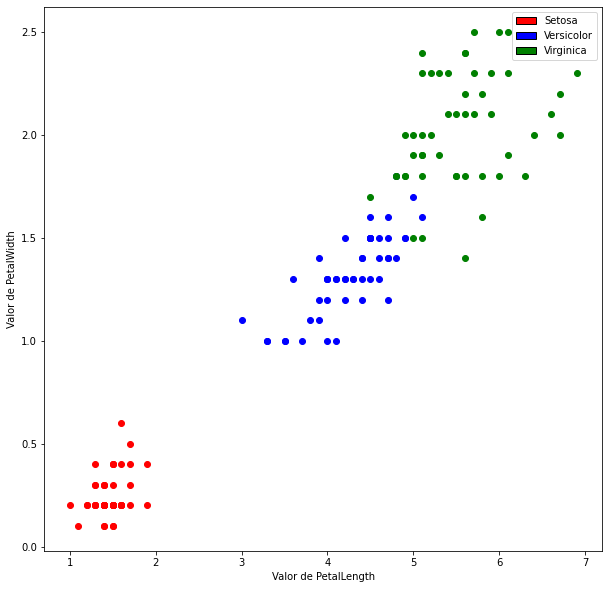

<Figure size 432x288 with 0 Axes>

In [12]:

plt.figure(figsize = (10, 10))
plt.scatter(iris_setosa["PetalLength"], iris_setosa["PetalWidth"], color = "red")
plt.scatter(iris_versicolor["PetalLength"], iris_versicolor["PetalWidth"], color = "blue")
plt.scatter(iris_virginica["PetalLength"], iris_virginica["PetalWidth"], color = "green")

plt.title("")
plt.xlabel("Valor de PetalLength")
plt.ylabel("Valor de PetalWidth")

handles = [matplotlib.patches.Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colores_grafico]
labels = ["Setosa", "Versicolor", "Virginica"]
plt.legend(handles, labels)

plt.show()
plt.clf()

In [13]:
matriz_correlacion = iris_dataset.frame.corr()

matriz_correlacion.style.background_gradient(cmap='coolwarm')

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
SepalLength,1.000000,-0.117570,0.871754,0.817941,0.782561
SepalWidth,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
PetalLength,0.871754,-0.428440,1.000000,0.962865,0.949035
PetalWidth,0.817941,-0.366126,0.962865,1.000000,0.956547
Class,0.782561,-0.426658,0.949035,0.956547,1.000000


## Preprocesamiento de los datos

### Separación en datos y etiquetas

In [14]:
x_iris = iris_dataset.data.to_numpy()
y_iris = iris_dataset.target.to_numpy()

### Normalización de los datos

In [15]:
import sklearn.preprocessing

normalizador_z_score = skl.preprocessing.StandardScaler()

normalizador_z_score.fit(x_iris)

x_iris_normalizado = normalizador_z_score.transform(x_iris)

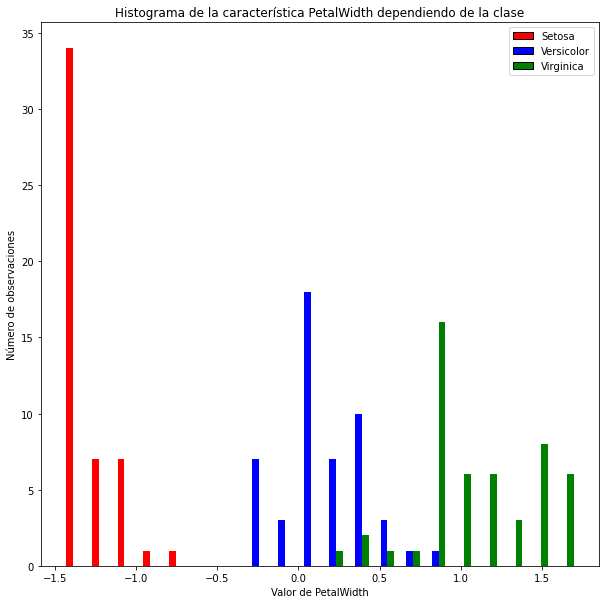

<Figure size 432x288 with 0 Axes>

In [16]:
iris_df_normalizado = pd.DataFrame(x_iris_normalizado)

iris_df_normalizado["Class"] = y_iris

iris_df_normalizado

iris_setosa = iris_df_normalizado[iris_df_normalizado["Class"] == 0]
iris_versicolor = iris_df_normalizado[iris_df_normalizado["Class"] == 1]
iris_virginica = iris_df_normalizado[iris_df_normalizado["Class"] == 2]

colores_grafico = ["red", "blue", "green"]

plt.figure(figsize = (10, 10))
plt.hist([iris_setosa[3], iris_versicolor[3], iris_virginica[3]], bins = 20, color = colores_grafico)
plt.title("Histograma de la característica {} dependiendo de la clase".format(column))
plt.xlabel("Valor de {}".format(column))
plt.ylabel("Número de observaciones")

handles = [matplotlib.patches.Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colores_grafico]
labels = ["Setosa", "Versicolor", "Virginica"]
plt.legend(handles, labels)

plt.show()
plt.clf()

In [17]:
matriz_correlacion = iris_df_normalizado.corr()

matriz_correlacion.style.background_gradient(cmap='coolwarm')

,0,1,2,3,Class
0,1.000000,-0.117570,0.871754,0.817941,0.782561
1,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
2,0.871754,-0.428440,1.000000,0.962865,0.949035
3,0.817941,-0.366126,0.962865,1.000000,0.956547
Class,0.782561,-0.426658,0.949035,0.956547,1.000000


### Reducción de dimensionalidad

#### Usando técnicas de descomposición: PCA

In [20]:
import sklearn.decomposition


pca_model = skl.decomposition.PCA(n_components = 0.90)

pca_model.fit(x_iris_normalizado)

print("Porcentaje de varianza original explicada por el nuevo conjunto de datos: ", pca_model.explained_variance_ratio_)


x_iris_pca = pca_model.transform(x_iris_normalizado) 


Porcentaje de varianza original explicada por el nuevo conjunto de datos:  [0.72962445 0.22850762]


In [23]:
iris_pca_normalizado = pd.DataFrame(x_iris_pca)

iris_pca_normalizado["Class"] = y_iris

iris_pca_normalizado

,0,1,Class
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


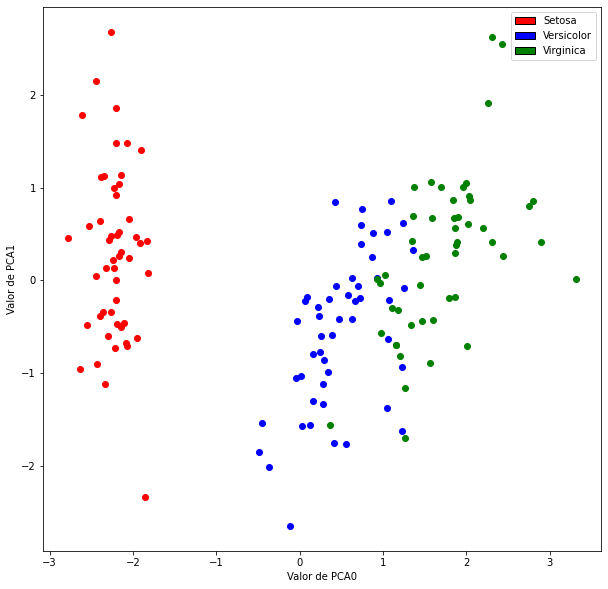

<Figure size 432x288 with 0 Axes>

In [28]:

iris_setosa_pca = iris_pca_normalizado[iris_pca_normalizado["Class"] == 0]
iris_versicolor_pca = iris_pca_normalizado[iris_pca_normalizado["Class"] == 1]
iris_virginica_pca = iris_pca_normalizado[iris_pca_normalizado["Class"] == 2]

colores_grafico = ["red", "blue", "green"]

plt.figure(figsize = (10, 10))
plt.scatter(iris_setosa_pca[0], iris_setosa_pca[1], color = "red")
plt.scatter(iris_versicolor_pca[0], iris_versicolor_pca[1], color = "blue")
plt.scatter(iris_virginica_pca[0], iris_virginica_pca[1], color = "green")

plt.title("")
plt.xlabel("Valor de PCA0")
plt.ylabel("Valor de PCA1")

handles = [matplotlib.patches.Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colores_grafico]
labels = ["Setosa", "Versicolor", "Virginica"]
plt.legend(handles, labels)

plt.show()
plt.clf()

#### Usando selección de características

In [36]:
import sklearn.feature_selection

feature_selector = skl.feature_selection.SelectKBest(skl.feature_selection.f_classif, k = 2)

feature_selector.fit(x_iris_normalizado, y_iris)

print("Puntuaciones: ", feature_selector.scores_)

x_iris_feature_selection = feature_selector.transform(x_iris_normalizado)

iris_feature_selection = pd.DataFrame(x_iris_feature_selection)

iris_feature_selection["Class"] = y_iris

iris_feature_selection

Puntuaciones:  [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]


,0,1,Class
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0
...,...,...,...
145,0.819596,1.448832,2
146,0.705921,0.922303,2
147,0.819596,1.053935,2
148,0.933271,1.448832,2


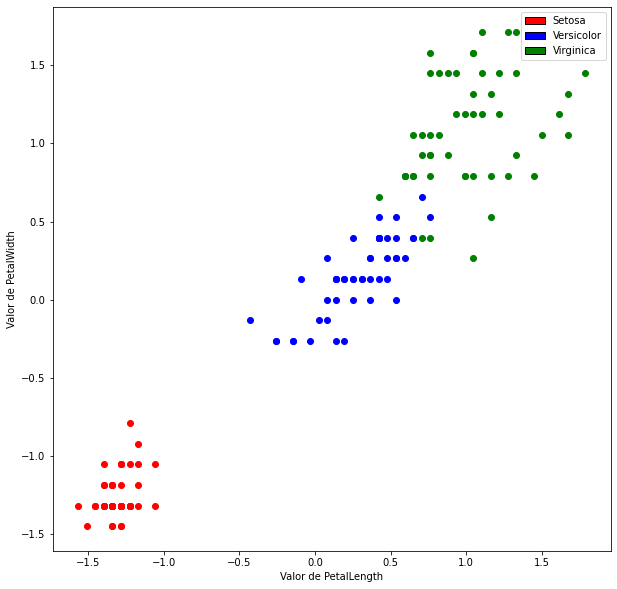

<Figure size 432x288 with 0 Axes>

In [37]:

iris_setosa_fs = iris_feature_selection[iris_feature_selection["Class"] == 0]
iris_versicolor_fs = iris_feature_selection[iris_feature_selection["Class"] == 1]
iris_virginica_fs = iris_feature_selection[iris_feature_selection["Class"] == 2]

colores_grafico = ["red", "blue", "green"]

plt.figure(figsize = (10, 10))
plt.scatter(iris_setosa_fs[0], iris_setosa_fs[1], color = "red")
plt.scatter(iris_versicolor_fs[0], iris_versicolor_fs[1], color = "blue")
plt.scatter(iris_virginica_fs[0], iris_virginica_fs[1], color = "green")

plt.title("")
plt.xlabel("Valor de PetalLength")
plt.ylabel("Valor de PetalWidth")

handles = [matplotlib.patches.Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colores_grafico]
labels = ["Setosa", "Versicolor", "Virginica"]
plt.legend(handles, labels)

plt.show()
plt.clf()

### Imputación de valores perdidos

In [63]:
x_iris_valores_perdidos = x_iris_normalizado.copy()

NUM_FILAS = x_iris_valores_perdidos.shape[0]
NUM_COLUMNAS = x_iris_valores_perdidos.shape[1]
PORCENTAJE_PERDIDOS = 0.05

for columna in range(0, NUM_COLUMNAS):
    indices_ruido = np.random.choice(range(0, NUM_FILAS), size = int(NUM_FILAS * PORCENTAJE_PERDIDOS), replace = False)
    
    x_iris_valores_perdidos[indices_ruido, columna] = np.nan

print(x_iris_valores_perdidos)


[[            nan  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [            nan             nan -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01             nan -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [64]:
import sklearn.impute

simple_impute = skl.impute.SimpleImputer(missing_values = np.nan, strategy = "mean")

simple_impute.fit(x_iris_valores_perdidos)

x_iris_reconstruido = simple_impute.transform(x_iris_valores_perdidos)

print(x_iris_reconstruido)


[[ 2.57022755e-03  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [ 2.57022755e-03  2.25582099e-02 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.96347475e-03 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [65]:
knn_imputer = skl.impute.KNNImputer(missing_values = np.nan, n_neighbors = 3)

knn_imputer.fit(x_iris_valores_perdidos)

x_iris_reconstruido_knn = knn_imputer.transform(x_iris_valores_perdidos)

print(x_iris_reconstruido_knn)


[[-6.98734720e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.38535265e+00  4.05146309e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.35917234e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [66]:
distancia_simple_imputer = np.abs(x_iris_normalizado - x_iris_reconstruido)
distancia_knn_imputer = np.abs(x_iris_normalizado - x_iris_reconstruido_knn)

recuento_simple_mejor_knn = np.count_nonzero(distancia_simple_imputer < distancia_knn_imputer)
recuento_knn_mejor_simple = np.count_nonzero(distancia_simple_imputer > distancia_knn_imputer)

print("Número de veces donde SimpleImputer se comporta mejor que KNNImputer:", recuento_simple_mejor_knn)
print("Número de veces donde KNNImputer se comporta mejor que SimpleImputer:", recuento_knn_mejor_simple)

Número de veces donde SimpleImputer se comporta mejor que KNNImputer: 8
Número de veces donde KNNImputer se comporta mejor que SimpleImputer: 20


In [ ]:
import sklearn.metrics

x_iris_como_columna = x_iris_normalizado.reshape(-1, 1)
x_iris_reconstruido_columna = x_iris_reconstruido.reshape(-1, 1)
x_iris_reconstruido_knn_columna = x_iris_reconstruido_knn.reshape(-1, 1)

error_cuadratico_medio_simple_imputer = skl.metrics.mean_squared_error(x_iris_como_columna, x_iris_reconstruido_columna) 
error_cuadratico_medio_knn_imputer = skl.metrics.mean_squared_error(x_iris_como_columna, x_iris_reconstruido_knn_columna) 

print("MSE cometido por SimpleImputer:", error_cuadratico_medio_simple_imputer)
print("MSE cometido por KNNImputer:", recuento_knn_mejor_simple)

## Entrenamiento, test y validación

In [ ]:
import sklearn.model_selection


x_train_iris, x_test_iris, y_train_iris, y_test_iris = skl.model_selection.train_test_split(x_iris_normalizado, y_iris, test_size = 0.2)


## Uso de modelos de Scikit-learn

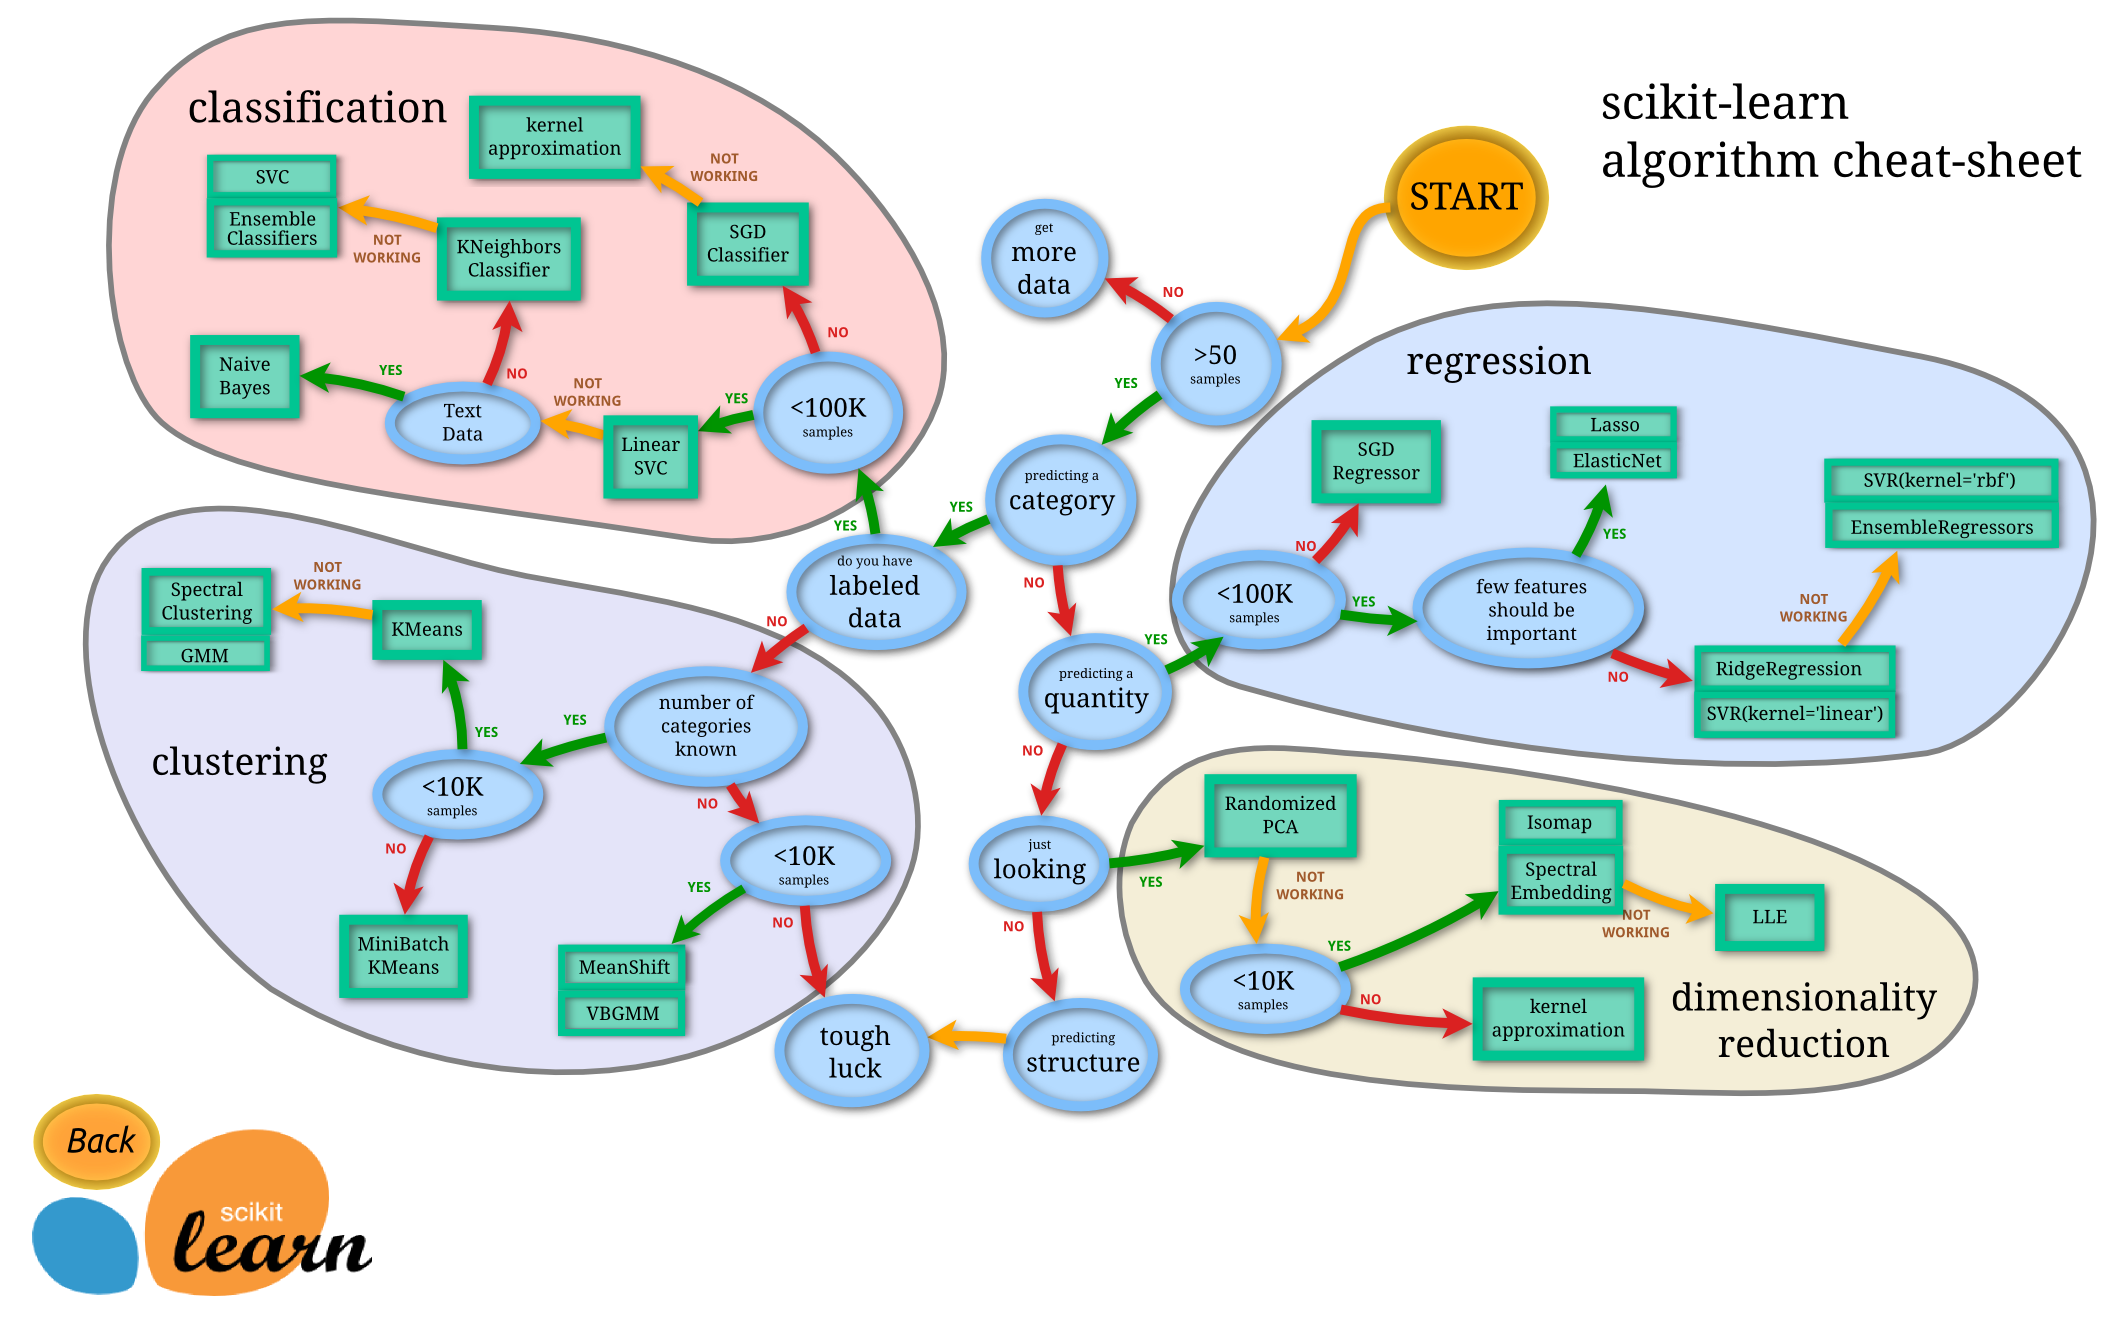